In [1]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import os

In [129]:
geo_query = "berlin rudi dutschke 26 straße"

In [130]:
url = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{geo_query}.json?access_token=pk.eyJ1IjoidGVzdHVzZXIxODc5IiwiYSI6ImNrcGlmYWp6djAxaXYyb3FyZHlnOGpyZmsifQ.hLuaODzBhYCnCTdSv97aKA"
response = requests.get(url).json()
geocode = response["features"][0]["center"]
f"We found this address: {response['features'][0]['place_name']}"

'We found this address: Rudi-Dutschke-Straße 26, 10969 Berlin, Germany'

In [131]:
coordinates = f"{geocode[0]},{geocode[1]}"
coordinates

'13.391442,52.506887'

In [119]:
api_request = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{coordinates},19/320x320?access_token=pk.eyJ1IjoidGVzdHVzZXIxODc5IiwiYSI6ImNrcGlmYWp6djAxaXYyb3FyZHlnOGpyZmsifQ.hLuaODzBhYCnCTdSv97aKA"

In [127]:
api_request

'https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/13.391865000423,52.506607999721,19/320x320?access_token=pk.eyJ1IjoidGVzdHVzZXIxODc5IiwiYSI6ImNrcGlmYWp6djAxaXYyb3FyZHlnOGpyZmsifQ.hLuaODzBhYCnCTdSv97aKA'

In [140]:
center_image = Image.open(requests.get(api_request, stream=True).raw)
type(center_image)

PIL.JpegImagePlugin.JpegImageFile

In [137]:
type(center_image)

PIL.JpegImagePlugin.JpegImageFile

In [132]:
one_unit_lat = 47/111111

In [133]:
one_unit_long = 31/111111

In [134]:
coordinates_list = [f"{geocode[0]-one_unit_lat},{geocode[1]+one_unit_long}",
                    f"{geocode[0]},{geocode[1]+one_unit_long}",
                    f"{geocode[0]+one_unit_lat},{geocode[1]+one_unit_long}",
                    f"{geocode[0]-one_unit_lat},{geocode[1]}",
                    f"{geocode[0]},{geocode[1]}",
                    f"{geocode[0]+one_unit_lat},{geocode[1]}",
                    f"{geocode[0]-one_unit_lat},{geocode[1]-one_unit_long}",
                    f"{geocode[0]},{geocode[1]-one_unit_long}",
                    f"{geocode[0]+one_unit_lat},{geocode[1]-one_unit_long}"]
coordinates_list

['13.391018999577,52.507166000279',
 '13.391442,52.507166000279',
 '13.391865000423,52.507166000279',
 '13.391018999577,52.506887',
 '13.391442,52.506887',
 '13.391865000423,52.506887',
 '13.391018999577,52.506607999721',
 '13.391442,52.506607999721',
 '13.391865000423,52.506607999721']

In [135]:
images = []
for coordinates in coordinates_list:
    api_request = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/{coordinates},19/320x320?access_token=pk.eyJ1IjoidGVzdHVzZXIxODc5IiwiYSI6ImNrcGlmYWp6djAxaXYyb3FyZHlnOGpyZmsifQ.hLuaODzBhYCnCTdSv97aKA"
    images.append(Image.open(requests.get(api_request, stream=True).raw))

<ipython-input-136-cf63299dacf4>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


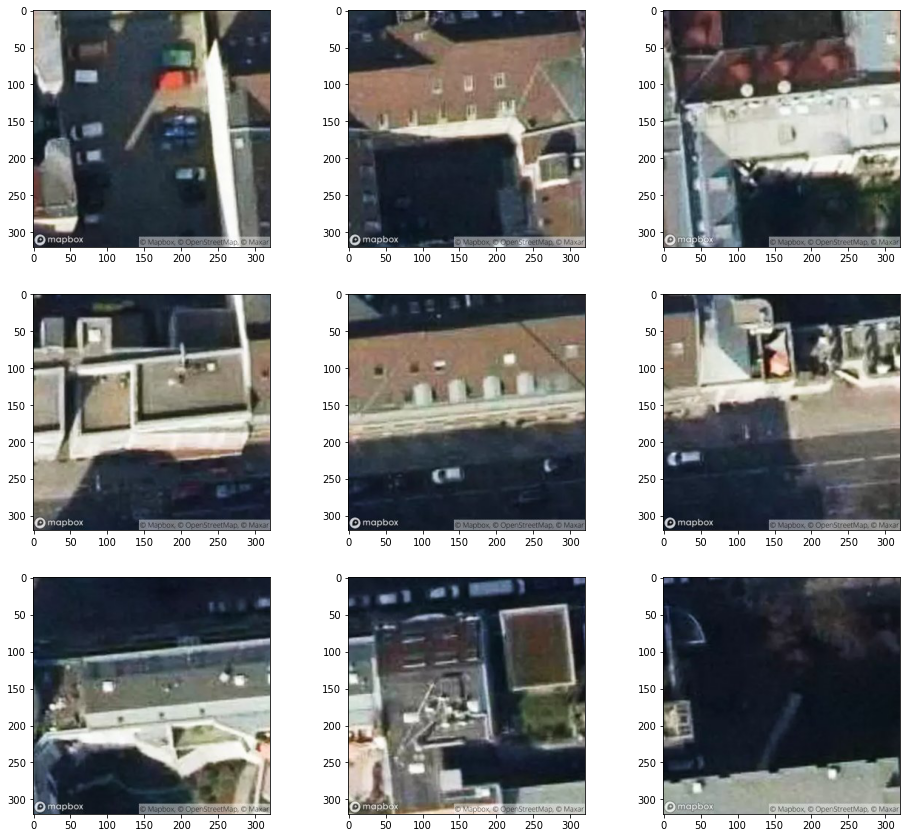

In [136]:
plt.figure(figsize=(16,20))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [177]:
%%time

image_names = ['api_mapbox_0.jpeg', 
               'api_mapbox_1.jpeg', 
               'api_mapbox_2.jpeg',
               'api_mapbox_3.jpeg', 
               'api_mapbox_4.jpeg', 
               'api_mapbox_5.jpeg',
               'api_mapbox_6.jpeg', 
               'api_mapbox_7.jpeg', 
               'api_mapbox_8.jpeg']
    
pred_list = []

for image in image_names:
    url = f'https://solarvision-10-iq5yzqlj2q-ew.a.run.app/predict?upload=data/predict_image/{image}' 
    response = requests.get(url)
    if response.status_code == 200:
        if response.json()['test'] == 1:
            pred_list.append(1) 
        else:
            pred_list.append(0)

CPU times: user 450 ms, sys: 31 ms, total: 481 ms
Wall time: 49.4 s


In [178]:
pred_list

[1, 1, 0, 0, 0, 0, 0, 0]

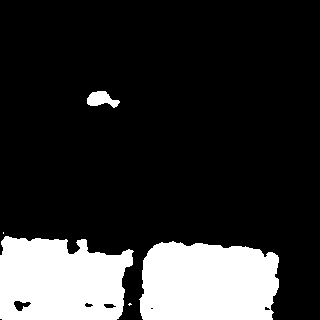

In [47]:
url = "https://solarvision-seg-iq5yzqlj2q-ew.a.run.app/segment"
params={'upload': 'data/predict_image/test_file.png'}
response = requests.get(url, params)
im_url = "https://00f74ba44b22fcd91b25b28f9f864cd10f1eb2b625-apidata.googleusercontent.com/download/storage/v1/b/solarvision-test/o/data%2Fsegment_image%2Fsegmented_image.png?jk=AFshE3WHa7_0MCiy4O1akcPpYtHz-rsKfhGVZlqX11SEanWc9Dhq7_6Uf0hiQUaLT8PNsuW0g7e1mM3ybbd7SV4wE1UUHLCUo5of0borudppK2fTcxN7bupOIouMO0ofxDQ4b3epFBYCNOAKg-ePTAlqOX9To_pIDAvVY7F-FzSE7Pb8fEnkgjGrKRq8YEqM0Te-FOke2Sc2Wc8bOm1wwwiwH14o_SGA_eE8uvjD0WyJXcjuzIREgvGG8JgYU0X4quiceqhbfVXUcjM0fzclUTRzJgdBi06DgXfN6i2DN8x9sC0oJKj_1Q63qVacHMphFDTI1NgZ5APFt8WpMxE-Sr3jKkR4EYXWbCtfsFv4hzOIZI2t96OsWmqHD6WVoVIY36H5zsX0UpIrah8L19HypNfUco8yp01_rFbLtOSz1zFdX_LGBLxvaRgyaBHcYmnX-YqsMByhgdZfC0dwh6EEq2nCppDosPpL51eGJmc-ZaACTRMQFrGxZ1dY35O2SuwIiNv-5-Fqm8b2l6O8e2f-3u4vJwvI5EyW6j9cWAtbnc8nL4FVV5Bwh7iIswXMRQhq4tGYUOxnD9_oW-M-iJq2jLXYOt1xVUZZJcEeLpq1V2CjQqT7nPmDxCBpmHj8Deg3FxFtLF7_GtrPy60UOAG-dAbSsd6Y15I3x84874FxHq6DrCStoEGKEo4lYCYwysVLnNNMsnwEoYx_8aZDNqurEILiBaA8jSm24txZQVkv0C6p3Ylr1SNjm1ZZ8H94fLIh-_FjCB4EI6a8mzBUMpF5PbKkkRTVbYS8vcKIuOgXDr82v9FFI9BVQUBzOoIerAVd67LDtyTfgVrAETxBCzm2t-lpS8rnElf5CoQXK6zdlSAzP54jfZw4fSNmPcAxEW_Z8BULFaRojEbpIaF18bM6EQf7bjmftDdZlcU0seks9TJSMfyMSR8zEjwTcPbVIlg5SSDHeCuldQk5Pk1COBy4ng9JGs8Kj7KzaCwYTJfNqWz6xWnI&isca=1"
Image.open(requests.get(im_url, stream=True).raw)
#im_url

In [32]:
from google.cloud import storage
from PIL import Image
import requests
from io import BytesIO
import pillow

bucket_name = 'solarvision-test'
sample_bucket = storage.Bucket(bucket_name)


url='https://storage.cloud.google.com/solarvision-test/data/segment_image/segmented_image.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

except PIL.UnidentifiedImageError

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f9b62674040>

In [49]:
from random import randint

In [55]:
randint(0,9999999999)

4877019483